# Amazon India Sales Dataset Analysis

### `Objective` - Increase revenue and improve product category performance


Calculate the percentage of revenue for the top 3 product categories, and aim to increase the percentage of revenue for the lowest of the top 3 categories by 5% by the end of Q3 2022.
    - reduce dependence on a single category

### `Preliminary Analysis`

Based on the analysis, we can draw some preliminary insights about the Q2 2022 performance of Amazon India:

- The total revenue for Q2 2022 decreased by -18.77% from April to June, with May revenue experiencing a -9.06% decrease from April, and June revenue seeing a -10.68% decrease from May, which is a cause of concern.

- The revenue is dominated by the product category "Set," which accounts for 49.88% of total revenue, followed by kurta with 27.09% and Western Dress with 14.28%.

- The top 5 product categories by average price in dollars are Set (\\$9.43), Saree (\\$9.14), Western Dress (\\$8.75), Ethnic Dress (\\$8.26), and Top (\\$6.09), indicating that these products are high-value orders.

- The total number of cancelled and returned orders was 49,178, which represents 17.53% of all orders. Of these, 14.22% were cancelled and 1.64% were returned.

- The average order amount by customer type is \\$8.21 for business customers and \\$7.37 for regular customers.

- The most popular product category varies by state, and it may be worthwhile to analyze the reasons behind these trends and invest in marketing campaigns or promotions accordingly.

**Analysis Summary and Recommendations**

- Use promotions to drive interest in the Western Dress product by targeting the top 50% of states ranked by sales revenue since their revenue is between 10 and 100 times more than the top ranked states by revenue in the lower 50%. 


**Implementation and Analysis of Strategies`**

- Work with the client to implement the following promotions:
    - Promotion to drive interest in the Western Dress category
- Monitor the Impact of the Strategies
    - Track sales revenue for Western Dress category after the promotions are implemented
- Analyze the Effectiveness of the Strategies
    - Conduct an analysis after the promotions have been running for some time


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

In [57]:
amazon = pd.read_csv('C:/Users/Ishan/Desktop/SCMlit/og.csv', low_memory=False)


Intial Dataset View 

In [58]:
amazon.head()

,index,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship_service,Style,SKU,Category,...,Qty,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,B2B,fulfilled_by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [59]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             128975 non-null  int64  
 1   Order_ID          128975 non-null  object 
 2   Date              128975 non-null  object 
 3   Status            128975 non-null  object 
 4   Fulfilment        128975 non-null  object 
 5   Sales_Channel     128975 non-null  object 
 6   ship_service      128975 non-null  object 
 7   Style             128975 non-null  object 
 8   SKU               128975 non-null  object 
 9   Category          128975 non-null  object 
 10  Size              128975 non-null  object 
 11  ASIN              128975 non-null  object 
 12  Courier_Status    122103 non-null  object 
 13  Qty               128975 non-null  int64  
 14  currency          121180 non-null  object 
 15  Amount            121180 non-null  float64
 16  ship_city         12

In [60]:
amazon.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order_ID,120379
Date,91
Status,13
Fulfilment,2
Sales_Channel,2
ship_service,2
Style,1377
SKU,7195
Category,9


In [61]:
amazon.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales_Channel,"[Amazon.in, Non-Amazon]"
ship_service,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [62]:
amazon.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship_postal_code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [63]:
amazon.describe(include='O')

,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship_service,Style,SKU,Category,Size,ASIN,Courier_Status,currency,ship_city,ship_state,ship_country,promotion_ids,fulfilled_by
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277
unique,120379,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277


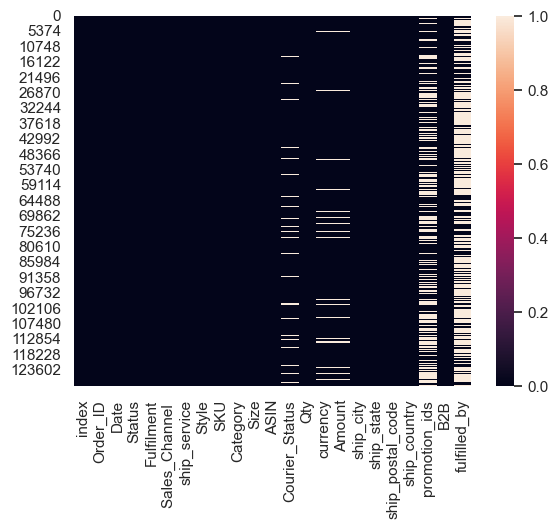

In [64]:
sns.heatmap(amazon.isnull())
plt.show()

In [65]:
amazon.isnull().sum()

index                   0
Order_ID                0
Date                    0
Status                  0
Fulfilment              0
Sales_Channel           0
ship_service            0
Style                   0
SKU                     0
Category                0
Size                    0
ASIN                    0
Courier_Status       6872
Qty                     0
currency             7795
Amount               7795
ship_city              33
ship_state             33
ship_postal_code       33
ship_country           33
promotion_ids       49153
B2B                     0
fulfilled_by        89698
dtype: int64

**Data Cleaning**

### Droping Columns

### Dropping Duplicates

In [66]:
amazon[amazon.duplicated(['Order_ID','ASIN'], keep=False)]

,index,Order_ID,Date,Status,Fulfilment,Sales_Channel,ship_service,Style,SKU,Category,...,Qty,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,B2B,fulfilled_by
30660,30660,406-0372545-6086735,04-12-2022,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,...,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN
30661,30661,406-0372545-6086735,04-12-2022,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,...,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN
41291,41291,408-0373839-4433120,04-05-2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,...,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN
41292,41292,408-0373839-4433120,04-05-2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,...,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN
52330,52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,...,0,NaN,NaN,Theni,TAMIL NADU,625579.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
52333,52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,...,1,INR,487.0,Theni,TAMIL NADU,625579.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
79844,79844,171-9628368-5329958,05-07-2022,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,...,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN
79845,79845,171-9628368-5329958,05-07-2022,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,...,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN
85790,85790,171-3249942-2207542,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,...,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
85791,85791,171-3249942-2207542,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,...,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [67]:
len(amazon)-len(amazon.drop_duplicates(['Order_ID','ASIN']))

7

In [68]:
amazon.drop_duplicates(['Order_ID','ASIN'],inplace = True,ignore_index=True)

### Filling NaN Values

In [69]:
amazon['Courier_Status'].fillna('unknown',inplace=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\1851608940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['Courier_Status'].fillna('unknown',inplace=True)


In [70]:
amazon['promotion_ids'].fillna('no promotion',inplace=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\4146040305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['promotion_ids'].fillna('no promotion',inplace=True)


In [71]:
amazon[amazon['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: proportion, dtype: object

In [72]:
amazon['Amount'].fillna(0,inplace=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\3580654317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['Amount'].fillna(0,inplace=True)


In [73]:
amazon['ship_city'].fillna('unknown', inplace = True)
amazon['ship_state'].fillna('unknown', inplace = True)
amazon['ship_postal_code'].fillna('unknown', inplace = True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\1460687998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['ship_city'].fillna('unknown', inplace = True)
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\1460687998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

### Renaming Columns

In [74]:
mapper = {'Order_ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category', 
          'Size':'size', 'ASIN':'asin', 'Courier_Status':'courier_ship_status', 'Qty':'order_quantity', 
          'Amount':'order_amount_($)', 'ship_city':'city', 'ship_state':'state', 'ship_postal_code':'zip', 
          'promotion_ids':'promotion','B2B':'customer_type'}



In [75]:
amazon.rename(columns=mapper, inplace =True)

### Convert Amount column values to $

In [76]:
# Convert INR to USD using an exchange rate of 1 INR = 0.014 USD
exchange_rate = 0.0120988
amazon['order_amount_($)'] = amazon['order_amount_($)'].apply(lambda x: x * exchange_rate)

### Convert B2B column values

In [77]:
amazon['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\1164148232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)


### Creating Datetime and adding Month column

In [78]:
amazon['date'] = pd.to_datetime(amazon['date'])

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\1895549944.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon['date'] = pd.to_datetime(amazon['date'])


In [79]:
# Filter to only include dates in March
march_dates = amazon['date'][amazon['date'].dt.month == 3]

# Get the number of unique days in March
march_dates.dt.day.nunique()


1

In [80]:
# dropping March dates from the dataset
amazon = amazon[(amazon['date'].dt.month != 3)]

In [81]:
amazon['month'] = amazon['date'].dt.month
amazon["month"].unique()

array([4, 5, 6], dtype=int32)

In [82]:
month_map = { 4: 'april',5: 'may',6: 'june'}
amazon['month'] = amazon['date'].dt.month.map(month_map)

In [83]:
# Define the desired order of months
month_order = ['april', 'may', 'june']

# Convert the month column to a categorical data type with the desired order
amazon['month'] = pd.Categorical(amazon['month'], categories=month_order, ordered=True)

In [84]:
print(f'This dataset contains the months {amazon["month"].unique()} for 2022')
print(f'The earliest date is {amazon["date"].min()}')
print(f'The latest date is {amazon["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


### Column Value Ordering 

In [85]:
# Define the desired order for the 'size' column
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Create an ordered categorical variable for the 'size' column
amazon['size'] = pd.Categorical(amazon['size'], categories=size_order, ordered=True)

**Data Visualizations**

### Checking The Clean Data

In [86]:
amazon.isnull().sum()

index                      0
order_ID                   0
date                       0
ship_status                0
fullfilment                0
Sales_Channel              0
ship_service               0
style                      0
sku                        0
product_category           0
size                       0
asin                       0
courier_ship_status        0
order_quantity             0
currency                7783
order_amount_($)           0
city                       0
state                      0
zip                        0
ship_country              33
promotion                  0
customer_type              0
fulfilled_by           89543
month                      0
dtype: int64

In [87]:
amazon.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128797
order_ID,120221
date,90
ship_status,13
fullfilment,2
Sales_Channel,2
ship_service,2
style,1377
sku,7194
product_category,9


In [88]:
amazon.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
ship_status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
fullfilment,"[Merchant, Amazon]"
Sales_Channel,"[Amazon.in, Non-Amazon]"
ship_service,"[Standard, Expedited]"
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
product_category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


### Preliminary Insights

In [89]:
revenue_by_month = amazon.groupby('month')['order_amount_($)'].sum()
percent_decrease_apr_to_may = (revenue_by_month['april'] - revenue_by_month['may']) / revenue_by_month['april'] * 100
percent_decrease_may_to_jun = (revenue_by_month['may'] - revenue_by_month['june']) / revenue_by_month['may'] * 100
total_decrease = (revenue_by_month['april'] - revenue_by_month['june']) / revenue_by_month['april'] * 100
print(f"Total revenue for April 2022: ${revenue_by_month['april']:,.2f}")
print(f"Total revenue for May 2022: ${revenue_by_month['may']:,.2f}, which is a -{percent_decrease_apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: ${revenue_by_month['june']:,.2f}, which is a -{percent_decrease_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%")
print("\n")

revenue_by_category = amazon.groupby('product_category')['order_amount_($)'].sum().sort_values(ascending=False)
print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: "${:,.2f}".format(x)))
print("\n")

revenue_by_category = amazon.groupby('product_category')['order_amount_($)'].sum()
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100).sort_values(ascending=False)
percent_revenue_by_category = percent_revenue_by_category.apply(lambda x: "{:.2f}%".format(x))
print("Percentage of revenue by product category:")
print(percent_revenue_by_category)
print("\n")

avg_price_by_category = amazon.groupby('product_category')['order_amount_($)'].mean()
avg_price_by_category = avg_price_by_category.sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5))
print("\n")

cancelled_orders = amazon[amazon['ship_status'].isin(['Cancelled', 'Shipped - Lost in Transit'])]
returned_orders = amazon[amazon['ship_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned
percent_cancelled = total_cancelled / len(amazon) * 100
percent_returned = total_returned / len(amazon) * 100
percent_cancelled_returned = total_cancelled_returned / amazon['order_quantity'].sum() * 100
print(f"Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")
print("\n")


monthly_order_data = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'mean', 'order_quantity': 'mean'})
monthly_order_data = monthly_order_data.rename(columns={'order_amount_($)': 'average_order_amount', 'order_quantity': 'average_order_quantity'})
print(monthly_order_data)
print("\n")

popular_category_by_state = amazon.groupby(['state', 'product_category'])['order_quantity'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['state', 'order_quantity'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])
print("Most popular product category in each state:")
print(popular_category_by_state)
print("\n")

avg_order_amount_by_customer_type = amazon.groupby('customer_type')['order_amount_($)'].mean()
print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: "${:,.2f}".format(x)))


Total revenue for April 2022: $348,913.76
Total revenue for May 2022: $317,285.20, which is a -9.06% decrease from April.
Total revenue for June 2022: $283,410.11, which is a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%


Total revenue by product category:
product_category
Set              $473,645.49
kurta            $257,272.15
Western Dress    $135,608.42
Top               $64,647.29
Ethnic Dress       $9,559.49
Blouse             $5,542.80
Bottom             $1,822.90
Saree              $1,499.45
Dupatta               $11.07
Name: order_amount_($), dtype: object


Percentage of revenue by product category:
product_category
Set              49.88%
kurta            27.09%
Western Dress    14.28%
Top               6.81%
Ethnic Dress      1.01%
Blouse            0.58%
Bottom            0.19%
Saree             0.16%
Dupatta           0.00%
Name: order_amount_($), dtype: object


Top 5 product categories by average price:
product_category
Set              9.4

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\2930968858.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_month = amazon.groupby('month')['order_amount_($)'].sum()
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\2930968858.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order_data = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'mean', 'order_quantity': 'mean'})


### Visuals

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\547136685.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'sum'})
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\547136685.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_month_revenue = monthly_sales.tail(1).iloc[0][0]
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\547136685.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_quarterly_revenue = monthly_sales.tail(3).head(2).mean()[0]
C:\Users\Ishan\

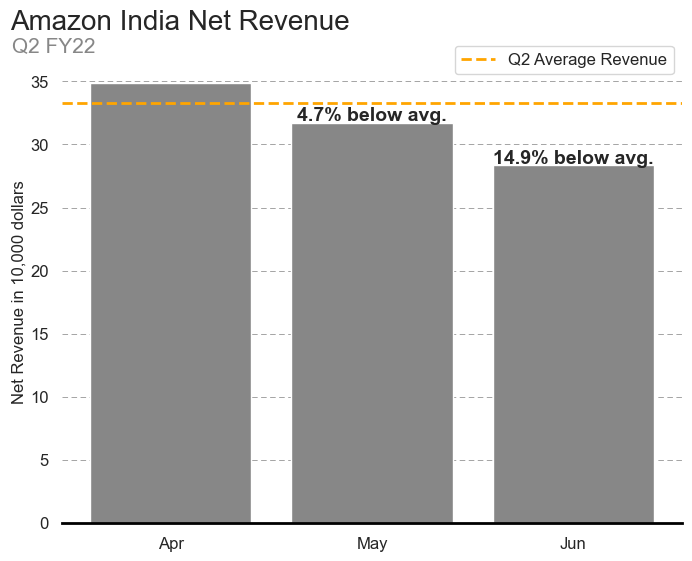

In [90]:
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

# Group the data by month and calculate the total sales revenue
monthly_sales = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'sum'})

# Get latest month revenue and average quarterly revenue
latest_month_revenue = monthly_sales.tail(1).iloc[0][0]
avg_quarterly_revenue = monthly_sales.tail(3).head(2).mean()[0]

# Compute percentage below average revenue for quarter
pct_below_avg = round((1 - (latest_month_revenue / avg_quarterly_revenue)) * 100, 1)

# Plot the monthly sales revenue
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(monthly_sales.index.strftime('%b'), monthly_sales['order_amount_($)'], color='#878787')

# Add label above each bar with the percentage below the average revenue for the quarter
for i, bar in enumerate(bars):
    if i == len(bars) - 1 or i < len(bars) - 2:
        continue
    month_sales = monthly_sales.iloc[i]['order_amount_($)']
    pct_below_avg = round((1 - (month_sales / avg_quarterly_revenue)) * 100, 1)
    ax.annotate(f'{pct_below_avg}% below avg.', 
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()-7000), 
                xytext=(0, 5), textcoords='offset points',  fontweight='bold', 
                ha='center', va='bottom', fontsize=14)

# Add label above the latest bar with the percentage below the average revenue for the quarter
latest_bar = bars[-1]
latest_month_sales = latest_bar.get_height()
pct_below_avg = round((1 - (latest_month_sales / avg_quarterly_revenue)) * 100, 1)
ax.annotate(f'{pct_below_avg}% below avg.', 
            xy=(latest_bar.get_x() + latest_bar.get_width()/2, latest_bar.get_height()-7000), 
            xytext=(0, 5), textcoords='offset points',  fontweight='bold',
            ha='center', va='bottom', fontsize=14)

# Add horizontal line at the average quarterly revenue
plt.axhline(avg_quarterly_revenue, linestyle='--', color='orange',linewidth=2, label='Q2 Average Revenue')

ax.set_title('Amazon India Net Revenue', fontsize=20, x=.19, y=1.05)
ax.text(-.08, 1.02, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_yticklabels(list(range(0,41,5)))
ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


plt.legend(bbox_to_anchor=(1,1.05), fontsize=12, fancybox=True)

ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()



C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\3018604462.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aov = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'sum', 'order_ID': 'nunique'})
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\3018604462.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  apr_val = monthly_aov['average_order_value'][0]
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\3018604462.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jun_val = monthly_aov['average_order_value'][2]


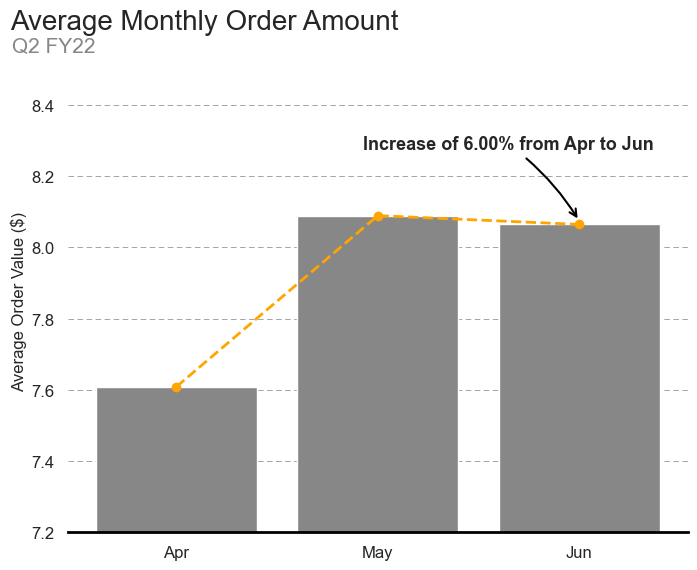

In [91]:
# Group the data by month and calculate the average order value
monthly_aov = amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'sum', 'order_ID': 'nunique'})
monthly_aov['average_order_value'] = monthly_aov['order_amount_($)'] / monthly_aov['order_ID']

# Calculate percent change from previous month
monthly_aov['pct_change'] = monthly_aov['average_order_value'].pct_change() * 100

# Create a barplot of the average order value per month
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=monthly_aov.index.strftime('%b'), y=monthly_aov['average_order_value'], ax=ax, color='#878787')

# Add line plot of the average order value per month
ax.plot(monthly_aov.index.strftime('%b'), monthly_aov['average_order_value'], linestyle='--', linewidth=2, color='orange', marker='o')


# Add callout for percent increase from April to June
apr_val = monthly_aov['average_order_value'][0]
jun_val = monthly_aov['average_order_value'][2]
pct_change = ((jun_val - apr_val) / apr_val) * 100
ax.annotate(f'Increase of {pct_change:.2f}% from Apr to Jun',fontweight='bold', xy=(2,8.074941567466606), xytext=(1.65, 8.264941567466606), fontsize=13, ha='center', va='bottom', arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=-0.1"))

# Set labels and title
ax.set_title('Average Monthly Order Amount', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('Average Order Value ($)', fontsize=12, labelpad=3)
ax.set_ylim(7.20, 8.50)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()




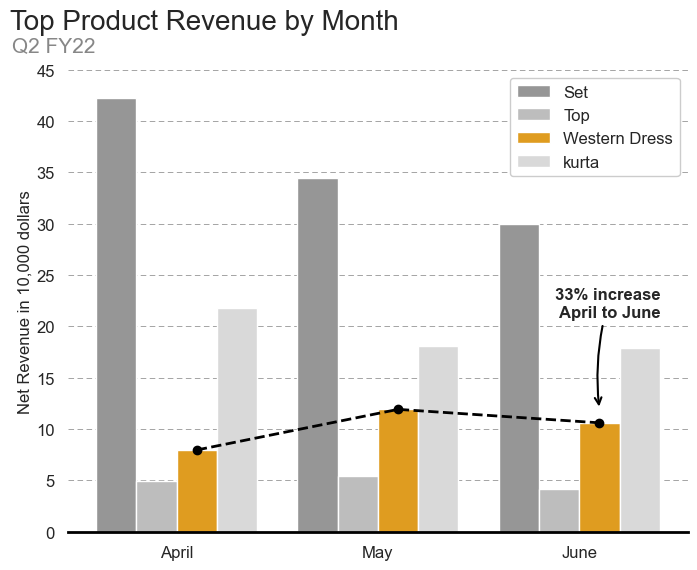

In [92]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(8,6))

# Define the desired order of months
month_order = ['April', 'May', 'June']

# Filter the data to only include the four product categories of interest
sales_data = amazon[amazon['product_category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])]

# Convert the date column to a datetime object
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract the month from the date column and set it as a new column
sales_data['month'] = sales_data['date'].dt.month_name()

# Aggregate the sales data by month and product category
sales_by_month = sales_data.groupby(['month', 'product_category'])['order_amount_($)'].sum().reset_index()

# Convert the month column to a categorical data type with the desired order
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

# Plot the sales data using seaborn
ax = sns.barplot(x='month', y='order_amount_($)', hue='product_category', data=sales_by_month,
                 palette=['#969696', '#bdbdbd', 'orange', '#d9d9d9'])

# Extract the sales data for Western Dress
sales_wd = sales_by_month[sales_by_month['product_category'] == 'Western Dress'].reset_index(drop=True)
sales_wd['month'] = pd.Categorical(sales_wd['month'], categories=month_order, ordered=True)
sales_wd.sort_values(by='month',inplace=True)
# Add line plot for total monthly revenue of Western Dress
ax.plot([0.1,1.1,2.1], sales_wd['order_amount_($)'], color='black', linestyle='--', linewidth=2, marker='o')


# Add annotation for percent increase from April to June for Western Dress
pct_increase = (sales_wd.loc[1, 'order_amount_($)'] - sales_wd.loc[0, 'order_amount_($)']) / sales_wd.loc[0, 'order_amount_($)'] * 100
ax.annotate(f'{pct_increase:.0f}% increase\n April to June',fontweight='bold', xy=(2.1, sales_wd.loc[2, 'order_amount_($)']), xytext=(1.88, sales_wd.loc[2, 'order_amount_($)'] + 40000),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=0.1"))


# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)


# Add title and axis labels
ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)

plt.legend(bbox_to_anchor=(1,1), fontsize=12, framealpha=1)

ax.set_xlabel(None)
ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)
ax.set_yticklabels(list(range(0,46,5)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')


# Show the plot
plt.show()
fig.savefig('Avg_MOV.png', dpi=300)
warnings.filterwarnings('default')  # Re-enable the warnings



C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\4170682516.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category_pct.index, y=sales_by_category_pct.values, ax=ax, palette=palette_colors)


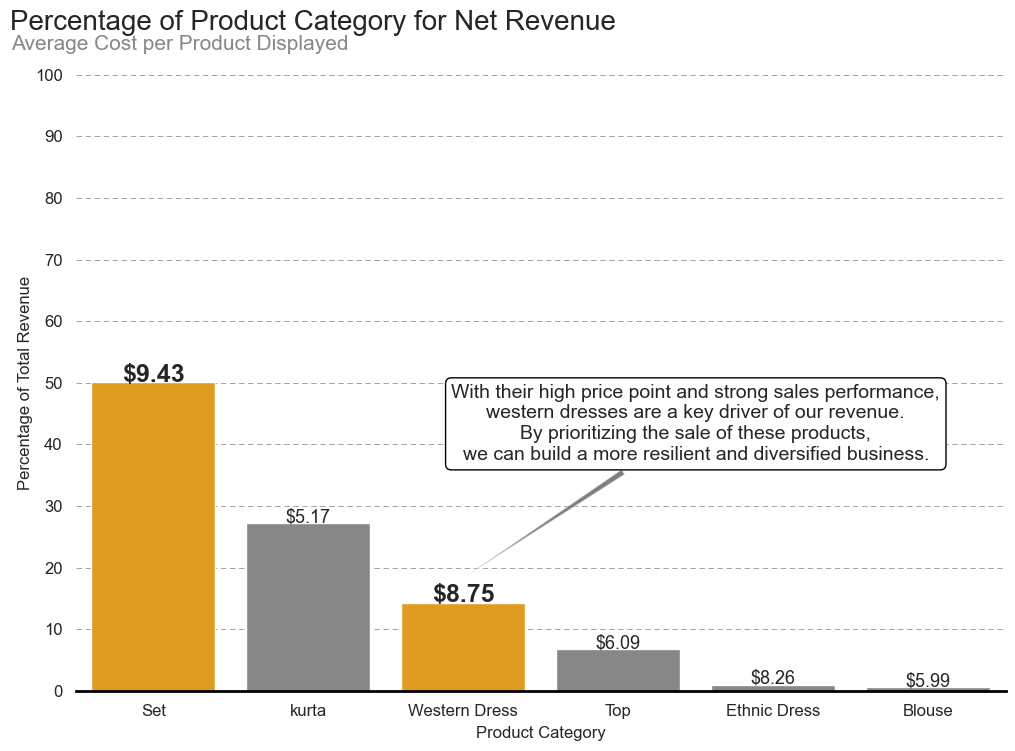

In [93]:
# Group the data by product category and calculate the total sales
sales_by_category = amazon.groupby('product_category')['order_amount_($)'].sum()

# Filter the categories to include
included_categories = ['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Blouse']
sales_by_category = sales_by_category.loc[included_categories]

# Calculate the total revenue
total_revenue = sales_by_category.sum()

# Calculate the percentage of total revenue for each category
sales_by_category_pct = (sales_by_category / total_revenue) * 100

# Sort the categories by total sales
sales_by_category_pct = sales_by_category_pct.sort_values(ascending=False)

# Create a bar chart to show the sales by product category
fig, ax = plt.subplots(figsize=(12,8))
palette_colors = ['orange' if cat in ['Set', 'Western Dress'] else '#878787' for cat in sales_by_category_pct.index]
sns.barplot(x=sales_by_category_pct.index, y=sales_by_category_pct.values, ax=ax, palette=palette_colors)

# Set font sizes for x and y labels, title, and ticks
# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = list(range(0,101,10))#np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)

ax.set_ylabel('Percentage of Total Revenue', labelpad=1)
ax.set_ylim(0, 100)
ax.set_xlabel('Product Category', labelpad=5)
ax.set_title('Percentage of Product Category for Net Revenue', fontsize=20, x=0.255, y=1.05, pad=10)
ax.text(-.07, 1.04, 'Average Cost per Product Displayed', fontsize=15, color='#878787', transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=12)
#ax.set_yticklabels(list(range(0,101,10)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

# Set font sizes for the bars and add annotations for Set, kurta, and Western Dress
for i, category in enumerate(sales_by_category_pct.index):
    avg_cost = amazon[amazon['product_category'] == category]['order_amount_($)'].mean()
    if category in ['Set', 'Western Dress']:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'${avg_cost:.2f}', ha='center', fontsize=18, fontweight='bold')
    else:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'${avg_cost:.2f}', ha='center', fontsize=13)


# Add a callout to emphasize the importance of western dresses for diversifying revenue
western_sales = sales_by_category_pct['Western Dress']
western_index = sales_by_category_pct.index.get_loc('Western Dress')

# Define the callout box properties
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=1)
arrow_props = dict(facecolor='black', arrowstyle='wedge', alpha=0.5)

# Set the position of the callout box
x_pos = western_index
y_pos = western_sales + 2
x_text = x_pos + 0.5
y_text = y_pos - 8

# Calculate the percentage of revenue from western dresses
western_pct = (western_sales / total_revenue) * 100

# Add the callout box to the plot
ax.annotate('With their high price point and strong sales performance,\nwestern dresses are a key driver of our revenue.\nBy prioritizing the sale of these products,\nwe can build a more resilient and diversified business.', xy=(x_pos, y_pos+2), xytext=(x_text+1, y_text+35), fontsize=14,
arrowprops=arrow_props, bbox=bbox_props, ha='center', va='center')


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()
fig.savefig('Percent_Prod_Revenuw.png', dpi=300)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\3994525383.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_size = amazon.groupby('size')['order_amount_($)'].sum()
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\3994525383.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\3994525383.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(list(range(0,20,2)))


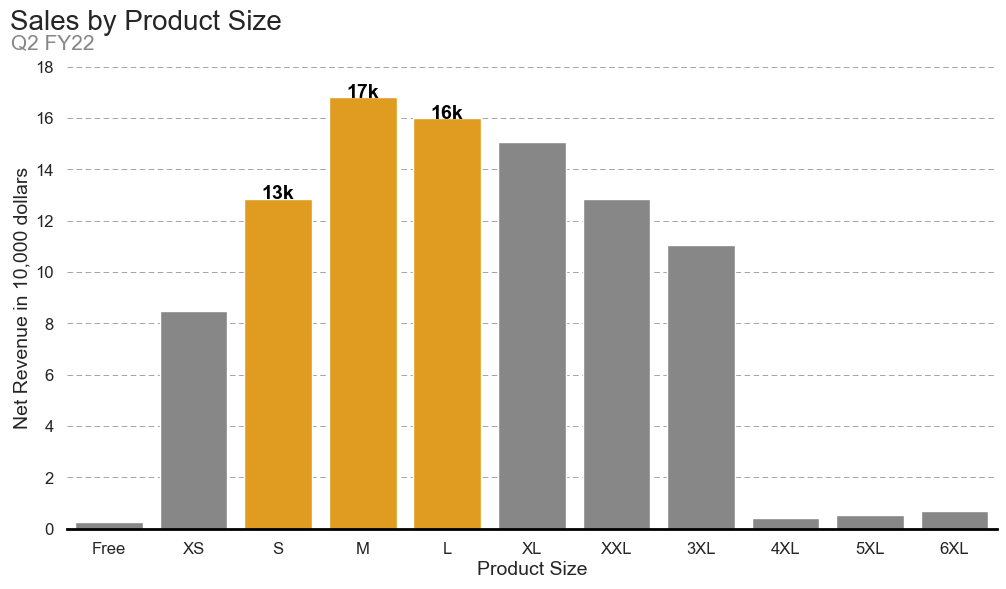

In [94]:
# Group the data by product size and calculate the total sales
sales_by_size = amazon.groupby('size')['order_amount_($)'].sum()

# Create a horizontal bar chart to show the sales by product size
fig, ax = plt.subplots(figsize=(12,6))

# Use a color palette to highlight specific sizes
palette_colors = ['orange' if size in ['S', 'M', 'L'] else '#878787' for size in sales_by_size.index]
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)


# Set font sizes for x and y labels, title, and ticks
ax.set_xlabel('Product Size', labelpad=3, fontsize=14)
ax.set_ylabel('Net Revenue in 10,000 dollars', labelpad=3, fontsize=14)
ax.set_yticklabels(list(range(0,20,2)))
ax.set_title('Sales by Product Size', fontsize=20, x=0.085, y=1.05, pad=10)
ax.text(-0.06, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
#ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)


ax.tick_params(axis='both', labelsize=12)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)

# Set font sizes for the bars and add annotations for S, M, and L sizes
for i, size in enumerate(sales_by_size.index):
    if size in ['S', 'M', 'L']:
        ax.text(i, sales_by_size.values[i], f'{sales_by_size.values[i]/10000:.0f}k', ha='center', fontsize=14, fontweight='bold', color='black')


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()
fig.savefig('Sales_Prod_Size.png', dpi=300)

C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\2873683613.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products += sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)].groupby('state').apply(lambda x: x.nlargest(3, 'order_amount_($)'))['product_category'].tolist()
C:\Users\Ishan\AppData\Local\Temp\ipykernel_23712\2873683613.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after group

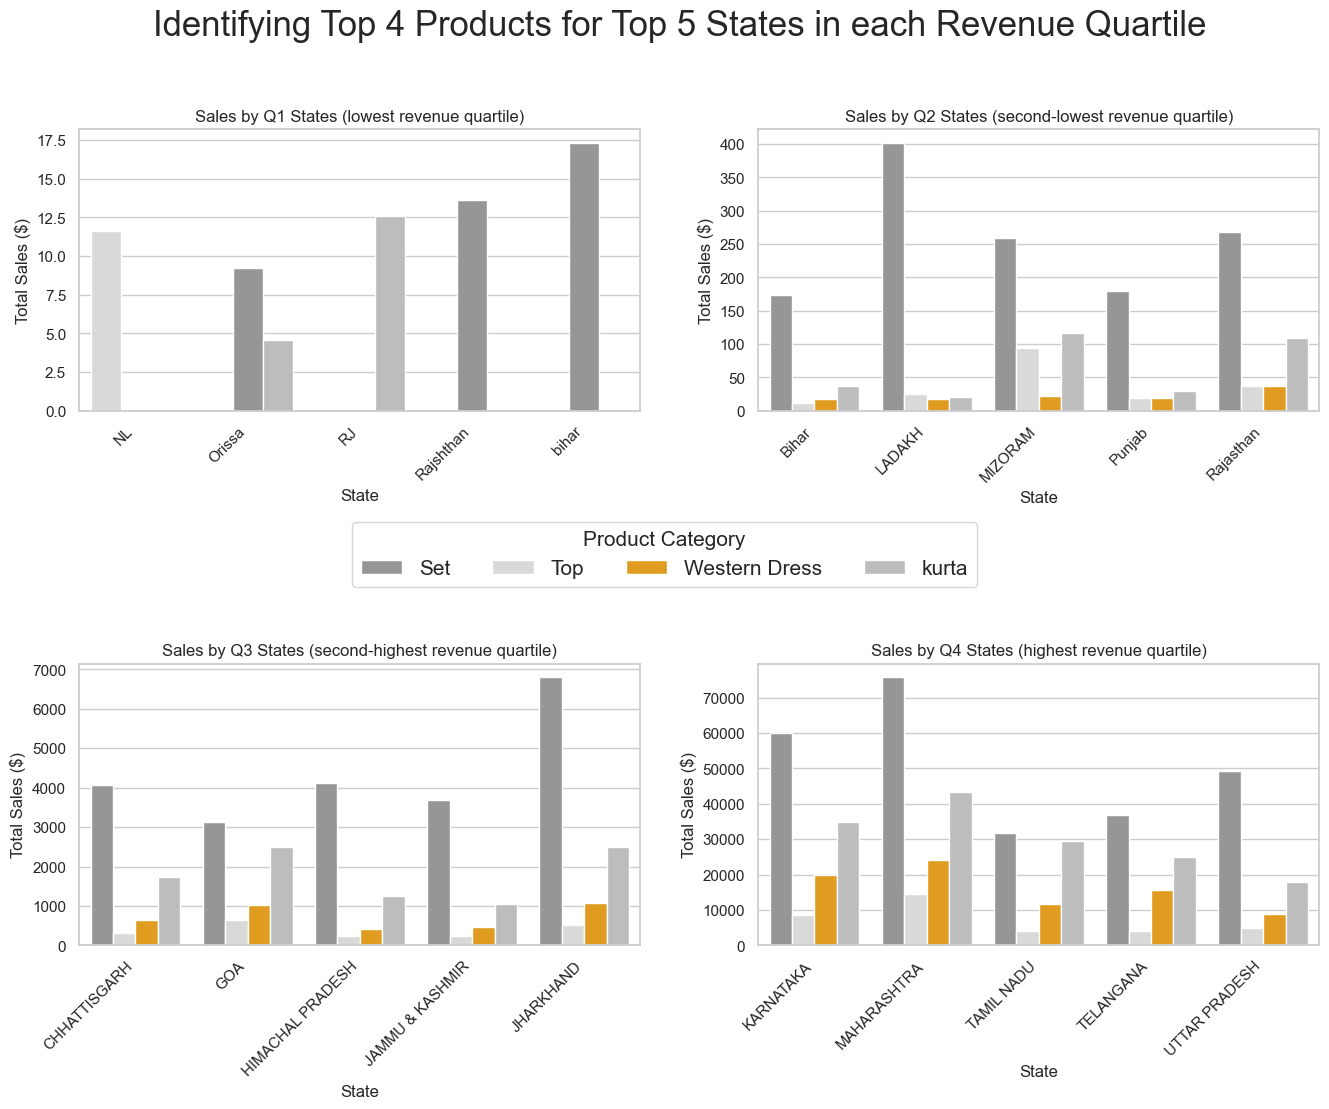

In [95]:
#Define the color palette for the product categories
colors = {'Top': '#d9d9d9', 'Set': '#969696', 'kurta': '#bdbdbd', 'Western Dress':'orange'}

# Group the data by state and calculate the total sales
sales_by_state = amazon.groupby('state')['order_amount_($)'].sum()

# Get the top 5 and bottom 5 states by sales
n_states = len(sales_by_state)
quartiles = pd.qcut(sales_by_state, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
top_states = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_states += sales_by_state[quartiles == q].nlargest(5).index.tolist()

# Filter the dataframe to include only the top states
top_sales = amazon[amazon['state'].isin(top_states)]

# Group the data by state and product, and calculate the total sales
sales_by_state_product = top_sales.groupby(['state', 'product_category'])['order_amount_($)'].sum().reset_index()

# Get the top 3 products for each quartile
top_products = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_products += sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)].groupby('state').apply(lambda x: x.nlargest(3, 'order_amount_($)'))['product_category'].tolist()

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharey=False)

# Create the subplot for quartile 1
q1_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q1'].index)]
q1_sales = q1_sales[q1_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_($)', hue='product_category', data=q1_sales, ax=axs[0, 0], palette=colors)
axs[0, 0].legend().set_visible(False)
axs[0, 0].set_title('Sales by Q1 States (lowest revenue quartile)')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 2
q2_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q2'].index)]
q2_sales = q2_sales[q2_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_($)', hue='product_category', data=q2_sales, palette=colors, ax=axs[0, 1])
axs[0, 1].legend().set_visible(False)
axs[0, 1].set_title('Sales by Q2 States (second-lowest revenue quartile)')
axs[0, 1].set_xlabel('State')
axs[0, 1].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 3
q3_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q3'].index)]
q3_sales = q3_sales[q3_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_($)', hue='product_category', data=q3_sales, palette=colors, ax=axs[1, 0])
axs[1, 0].legend().set_visible(False)
axs[1, 0].set_title('Sales by Q3 States (second-highest revenue quartile)')
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 4
q4_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q4'].index)]
q4_sales = q4_sales[q4_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount_($)', hue='product_category', data=q4_sales, palette=colors, ax=axs[1, 1])
axs[1, 1].legend().set_visible(False)
axs[1, 1].set_title('Sales by Q4 States (highest revenue quartile)')
axs[1, 1].set_xlabel('State')
axs[1, 1].set_ylabel('Total Sales ($)')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=.9, wspace=.21, bottom=.2)

# Rotate the x-axis tick labels
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add a single legend to the figure
handles, labels = axs[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=len(labels), title='Product Category', fontsize=15, title_fontsize = 15)
    
    
plt.suptitle("Identifying Top 4 Products for Top 5 States in each Revenue Quartile", fontsize = 25)
# Show the figure
plt.show()
fig.savefig('Top_Products_Top_States.png', dpi=300)
